# Tutorial for galaxyEmulator

galaxyEmulator is a python wrapper for simulating galaxies from [IllustrisTNG](https://www.tng-project.org/) using [SKIRT](https://skirt.ugent.be/root/_home.html) radiative transfer project.

## Imports

In [1]:
import sys
sys.path.append('..')

In [2]:
from galaxyEmulator.config import Configuration
from galaxyEmulator.preprocess import PreProcess
from galaxyEmulator.postprocess import PostProcess

## Create configurations

In [3]:
# Initialize configuration
config = Configuration()

In [4]:
# Get base configuration
conf = config.get_config()

Conflicts in config are indicated in RED.
No conflicts in config


In [5]:
# Include surveys
config.add_survey('CSST')

In [6]:
# reload configuration
conf = config.get_config()

Conflicts in config are indicated in RED.
No conflicts in config


In [7]:
config.add_survey('HST')
conf = config.get_config()

Conflicts in config are indicated in RED.
No conflicts in config


In [8]:
conf

{'dataDir': '../Data',
 'filePath': '../../TNG-100',
 'workingDir': 'run',
 'simulationMode': 'ExtinctionOnly',
 'includeDust': False,
 'dustEmissionType': 'Equilibrium',
 'dustModel': 'ZubkoDustMix',
 'minWavelength': '0.1',
 'maxWavelength': '1.2',
 'smoothLengthFromNeighbors': False,
 'NthNeighbor': '32',
 'maxSmoothingLength': '0.8',
 'boxLengthScale': '20',
 'maxBoxLength': '300',
 'wavelengthGrid': 'Linear',
 'numWavelengths': '300',
 'minLevel': '6',
 'maxLevel': '10',
 'numPackets': '1e7',
 'SEDFamily': 'BC03',
 'initialMassFunction': 'Chabrier',
 'minStellarMass': '1e10',
 'maxStellarMass': 'inf',
 'numViews': '3',
 'randomViews': True,
 'inclinations': '0,90,180',
 'azimuths': '0,90,180',
 'FoVboxLengthRatio': '1',
 'postProcessing': True,
 'saveDataCube': True,
 'spatialResol': '100',
 'imageUnit': 'electron',
 'displaySED': True,
 'displaySEDxlogscale': True,
 'snapNum': '94',
 'fixedRedshift': '0.06',
 'numThreads': '12',
 'recordComponents': False,
 'ageThreshold': '10',


In [9]:
conf['randomViews'] = False
conf['inclinations'] = '0,0,90'
conf['azimuths'] = '0,90,90'

In [10]:
config.save_config()

## Preprocessing

In [11]:
# Initialize PreProcess
preprocess = PreProcess(conf)

In [12]:
# Get subhalos following conditions indicated in conf
preprocess.get_subhalos()

6399 subhalos in snapshot 94 in stellar mass higher than 10^10.0 [M_sun]


In [13]:
# Get subhaloIDs
preprocess.get_subhaloIDs()

array([     0,      1,      2, ..., 644966, 646870, 649674])

In [14]:
# Initialize for subhalo with ID=649674
preprocess.subhalo(subhaloID=649674)

Stellar Mass of Subhalo 649674 is 10^10.100269160520734 [M_sun].


In [15]:
# Preparation of files for SKIRT to run
preprocess.prepare()

Retrieving Stellar and Gas particles.
MAPPING III particles: 0
BC03 particles: 13399
Creating .ski file.
------estimate memory usage------
numViews: 3
numSpatialPixels: 890
numWavelengthPixels: 300
Estimated memory usage: 5.703 GB


In [16]:
# Run SKIRT
preprocess.runSKIRT()

Running SKIRT
02/12/2024 14:40:14.200   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
02/12/2024 14:40:14.200   Running on 2488h for xczhou
02/12/2024 14:40:14.200   Constructing a simulation from ski file 'skirt.ski'...
02/12/2024 14:40:14.256   Starting simulation skirt using 12 threads and a single process...
02/12/2024 14:40:14.256   Starting setup...
02/12/2024 14:40:14.256     Panchromatic wavelength regime
02/12/2024 14:40:14.256     With transfer medium
02/12/2024 14:40:14.256     Redshift: 0.06
02/12/2024 14:40:14.256     Luminosity distance: 277.531 Mpc
02/12/2024 14:40:14.256     Model and grid symmetry: 3D
02/12/2024 14:40:14.256     Photon life cycle: no explicit absorption; with forced scattering
02/12/2024 14:40:14.256   BruzualCharlotSEDFamily opened stored table /share/xczhou/SKIRT/resources/SKIRT9_Resources_Core/SED/BruzualCharlotSEDFamily_Chabrier_hr.stab
02/12/2024 14:40:14.256   ParticleSource reads smoothed source particles from text file /sh

## Postprocessing

In [17]:
# Initialize PostProcess
postprocess = PostProcess(preprocess.properties, conf)

Run Postprocessing


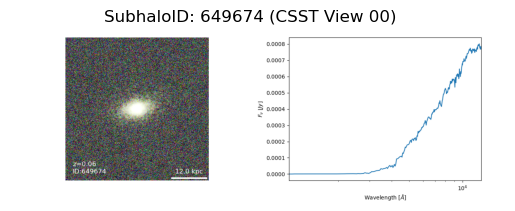

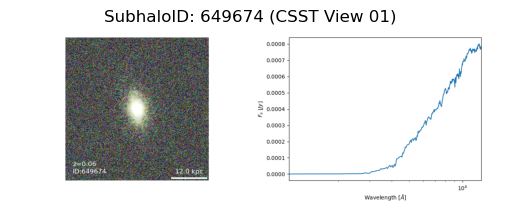

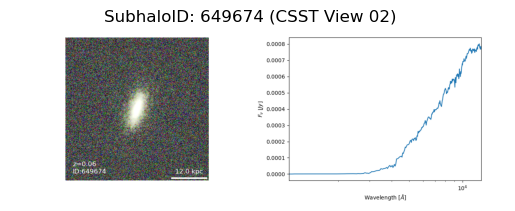

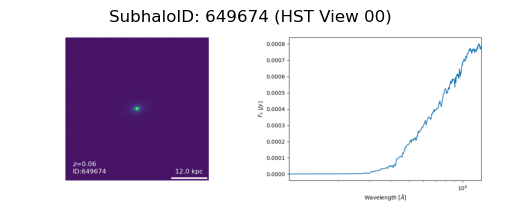

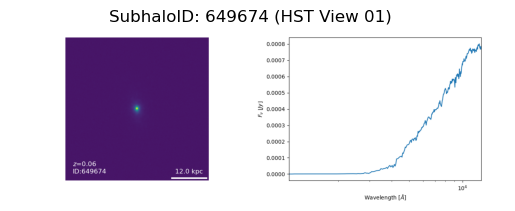

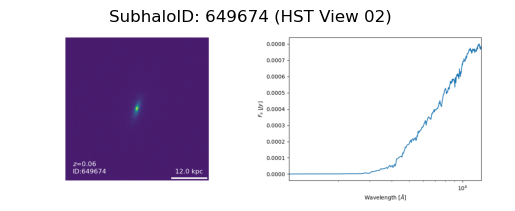

Postprocessing finished! Clearing workingDir!


In [18]:
# Run postprocessing
postprocess.runPostprocess(showImages=True)

## For multiple subhalos

Just simply initialize them by calling `prepare.subhalo(ID)` and call other methods.

In [19]:
for ID in [644966, 646870]:
    preprocess.subhalo(ID) # initialize for subhalo with ID
    preprocess.prepare()
    preprocess.runSKIRT()

    postprocess = PostProcess(preprocess.properties, conf)
    postprocess.runPostprocess()

Stellar Mass of Subhalo 644966 is 10^10.009690483776847 [M_sun].
Retrieving Stellar and Gas particles.
MAPPING III particles: 0
BC03 particles: 10472
Creating .ski file.
------estimate memory usage------
numViews: 3
numSpatialPixels: 851
numWavelengthPixels: 300
Estimated memory usage: 5.214 GB
Running SKIRT
02/12/2024 14:41:25.823   Welcome to SKIRT v9.0 (git 382ad4b built on 15/08/2024 at 01:46:45)
02/12/2024 14:41:25.823   Running on 2488h for xczhou
02/12/2024 14:41:25.823   Constructing a simulation from ski file 'skirt.ski'...
02/12/2024 14:41:25.880   Starting simulation skirt using 12 threads and a single process...
02/12/2024 14:41:25.880   Starting setup...
02/12/2024 14:41:25.880     Panchromatic wavelength regime
02/12/2024 14:41:25.880     With transfer medium
02/12/2024 14:41:25.880     Redshift: 0.06
02/12/2024 14:41:25.880     Luminosity distance: 277.531 Mpc
02/12/2024 14:41:25.880     Model and grid symmetry: 3D
02/12/2024 14:41:25.880     Photon life cycle: no explic

## Outputs

`./dataCubes` are the dataCubes of **SubhaloID** generated from SKIRT, if `saveDataCube == True`  
`./mock_CSST` are the bandpass images of **SubhaloID** for CSST  
`./mock_HST` are the bandpass images of **SubhaloID** for HST  

Folder tree:
```bash
mock_{survey}/
└── Subhalo_{ID}/
    ├── dusts.txt # File for dust particles
    ├── galaxy_image.fits # Bandpass images
    ├── galaxy_SED_view_{v}.png # SED in different views, if displaySED == True
    ├── galaxy_SED.fits # SEDs
    ├── galaxy_view_{v}.png # Images in different views, if imgDisplay_{survey} == True
    ├── quenched_stars.txt # File for stars older than 10 Myr
    ├── skirt_parameters.xml # SKIRT parameters
    └── starforming_stars.txt # File for stars younger than 10 Myr
```

### Bandpass images

Bandpass images are saved in pages of the fits file, and each page includes images in different views.

In [20]:
from astropy.io import fits

In [21]:
CSST_imgs = fits.open('mock_CSST/Subhalo_649674/galaxy_image.fits')

In [22]:
CSST_imgs[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  481                                                  
NAXIS2  =                  481                                                  
NAXIS3  =                    3                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
SNAPNUM = '94      '           / Snapshot ID of IllustrisTNG                    
SURVEY  = 'CSST    '           / Survey                                         
NFILTERS=                    7 / Number of filters                              
NUMVIEWS=                    3 / Number of views                                
INCLI_00=                  0

In [37]:
numfilters = CSST_imgs[1].header['nfilters']
for i in range(numfilters):
    i = i + 1
    header = CSST_imgs[i].header
    print(f'{header["survey"]}.{header["filter"]} Pixel Scale: {header["ps"]}')

CSST.NUV Pixel Scale: 0.074
CSST.u Pixel Scale: 0.074
CSST.g Pixel Scale: 0.074
CSST.r Pixel Scale: 0.074
CSST.i Pixel Scale: 0.074
CSST.z Pixel Scale: 0.074
CSST.y Pixel Scale: 0.074


In [28]:
HST_imgs = fits.open('mock_HST/Subhalo_646870/galaxy_image.fits')

In [36]:
numfilters = HST_imgs[1].header['nfilters']
for i in range(numfilters):
    i = i + 1
    header = HST_imgs[i].header
    print(f'{header["survey"]}.{header["filter"]} Pixel Scale: {header["ps"]}')

HST.UV_F275W Pixel Scale: 0.04
HST.UV_F390W Pixel Scale: 0.04
HST.UV_F814W Pixel Scale: 0.04
HST.IR_F105W Pixel Scale: 0.13
HST.IR_F140W Pixel Scale: 0.13
